In [1]:
from google.colab import files
file = files.upload()

Saving final_study_v22.csv to final_study_v22.csv


In [2]:
import pandas as pd
df = pd.read_csv('final_study_v22.csv') #(change with the final name which is final_study_all_data_v2.csv)#

In [ ]:
df

In [12]:
avg = df.groupby(['Sentence', 'WordToken', 'Condition_ID', 'POS','groundedness'], as_index=False)['RT'].mean()

In [13]:
avg = avg[avg['Condition_ID']!='wrong']

In [14]:
avg

,Sentence,WordToken,Condition_ID,POS,groundedness,RT
0,A baby elephant walking through a shallow pool...,a_5_22,correct,Closed,1.750000,654.500000
1,A baby elephant walking through a shallow pool...,a_5_22,no,Closed,1.750000,672.600000
3,A baby elephant walking through a shallow pool...,baby_1_22,correct,Open,6.625000,982.857143
4,A baby elephant walking through a shallow pool...,baby_1_22,no,Open,6.625000,988.800000
6,A baby elephant walking through a shallow pool...,elephant_2_22,correct,Open,8.875000,704.928571
...,...,...,...,...,...,...
3742,Two young women are eating hot dogs while walk...,while_7_43,no,Closed,4.000000,1027.100000
3744,Two young women are eating hot dogs while walk...,women_2_43,correct,Open,9.428571,683.250000
3745,Two young women are eating hot dogs while walk...,women_2_43,no,Open,9.428571,708.100000
3747,Two young women are eating hot dogs while walk...,young_1_43,correct,Open,7.000000,851.000000


In [16]:
pivot_df = avg.pivot(index=['WordToken','POS','groundedness'], columns=['Condition_ID'], values='RT').reset_index()
pivot_df['difference'] = pivot_df['correct'] - pivot_df['no']

In [17]:
pivot_df

Condition_ID,WordToken,POS,groundedness,correct,no,difference
0,East_8_25,Open,7.375000,1246.461538,1214.250000,32.211538
1,No_8_37,Open,9.142857,1979.000000,1133.333333,845.666667
2,Rd._12_25,Open,8.500000,1108.538462,1154.000000,-45.461538
3,Stops._9_37,Open,9.142857,1626.400000,1161.222222,465.177778
4,Village_9_25,Open,8.500000,1340.615385,1656.750000,-316.134615
...,...,...,...,...,...,...
1245,young_1_43,Open,7.000000,851.000000,923.300000,-72.300000
1246,young_1_61,Open,8.500000,762.200000,929.363636,-167.163636
1247,young_1_94,Open,2.250000,745.444444,861.857143,-116.412698
1248,young_6_103,Open,7.500000,865.375000,834.285714,31.089286


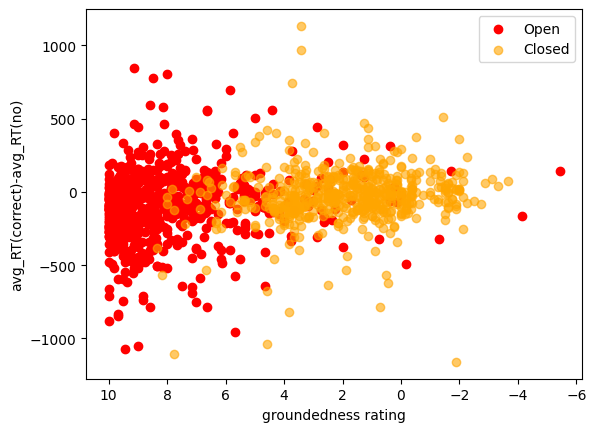

In [30]:
import matplotlib.pyplot as plt

pivot_df_m = pivot_df[(pivot_df['difference']<=1500) & (pivot_df['difference']>=-1500)]

groundedness_open = pivot_df_m.loc[pivot_df_m['POS'] == 'Open', 'groundedness']
groundedness_closed = pivot_df_m.loc[pivot_df_m['POS'] == 'Closed', 'groundedness']

difference_open = pivot_df_m.loc[pivot_df_m['POS']=='Open','difference']
difference_closed = pivot_df_m.loc[pivot_df_m['POS']=='Closed','difference']

plt.scatter(groundedness_open, difference_open, color='red', label='Open')

plt.scatter(groundedness_closed, difference_closed, color='orange', alpha=0.6,label='Closed')
plt.ylabel('avg_RT(correct)-avg_RT(no)')
plt.xlabel('groundedness rating')
plt.gca().invert_xaxis()
plt.legend()

In [9]:
avg2 = df.groupby(['Sentence', 'WordToken', 'Condition_ID', 'groundedness','blip2_surp','gpt2_surp','POS','Frequency','Length'], as_index=False)['RT'].mean()

In [10]:
df1 = avg2[(avg2['Condition_ID']=='no')]
df2 = avg2[(avg2['Condition_ID']=='correct')]
df3 = avg2[(avg2['Condition_ID']=='wrong')]

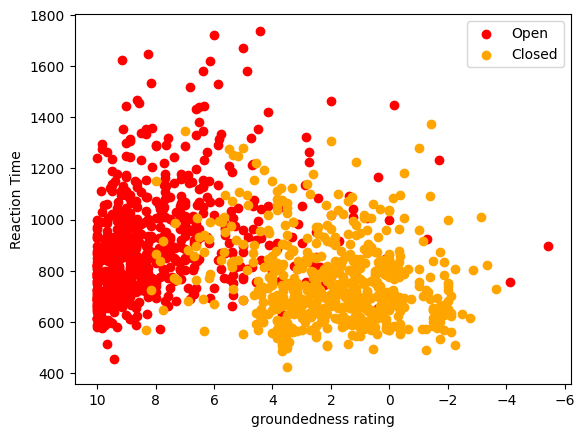

In [12]:
import matplotlib.pyplot as plt

df2_m = df2[df2['RT']<=1800]
word_token_open = df2_m.loc[df2_m['POS'] == 'Open', 'groundedness']
difference_open = df2_m.loc[df2_m['POS'] == 'Open', 'RT']


word_token_closed = df2_m.loc[df2_m['POS'] == 'Closed', 'groundedness']
difference_closed = df2_m.loc[df2_m['POS'] == 'Closed', 'RT']


plt.scatter(word_token_open, difference_open, color='red', label='Open')


plt.scatter(word_token_closed, difference_closed, color='orange', label='Closed')

# Plotting points based on the condition with blue color
#plt.scatter(df2['groundedness'], df2['Total_RT'], color='blue', label='correct')

# Label the axes and set the title
plt.xlabel('groundedness rating')
plt.ylabel('Reaction Time')
plt.gca().invert_xaxis()
plt.legend()




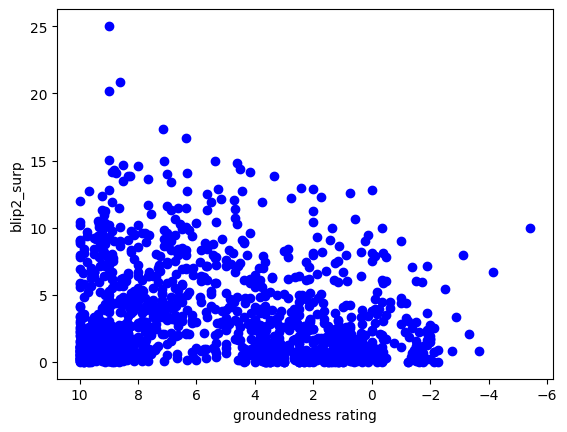

In [49]:
import matplotlib.pyplot as plt


# Plotting points based on the condition with blue color
plt.scatter(df2['groundedness'], df2['blip2_surp'], color='blue', label='correct')

# Label the axes and set the title
plt.xlabel('groundedness rating')
plt.ylabel('blip2_surp')
plt.gca().invert_xaxis()
#plt.legend()



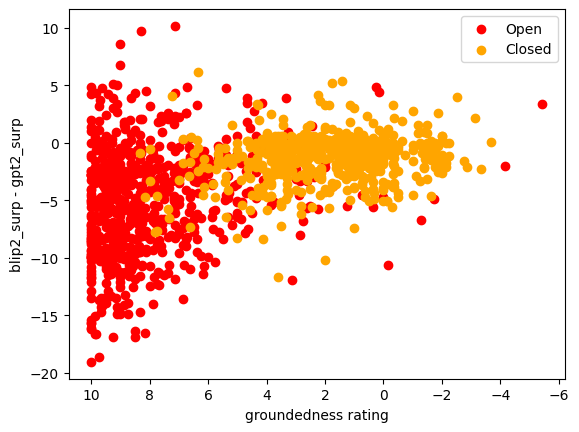

In [20]:
import matplotlib.pyplot as plt

word_token_open_gpt = df2.loc[df2['POS'] == 'Open', 'gpt2_surp']
word_token_open_blip = df2.loc[df2['POS'] == 'Open', 'blip2_surp']
groundedness_open = df2.loc[df2['POS'] == 'Open', 'groundedness']

word_token_closed_gpt = df2.loc[df2['POS'] == 'Closed', 'gpt2_surp']
word_token_closed_blip = df2.loc[df2['POS'] == 'Closed', 'blip2_surp']
groundedness_closed = df2.loc[df2['POS'] == 'Closed', 'groundedness']

plt.scatter(groundedness_open, word_token_open_blip-word_token_open_gpt, color='red', label='Open')


plt.scatter(groundedness_closed, word_token_closed_blip-word_token_closed_gpt, color='orange', label='Closed')

# Plotting points based on the condition with blue color
#plt.scatter(df2['groundedness'], df2['blip2_surp']-df2['gpt2_surp'], color='blue', label='correct')

# Label the axes and set the title
plt.xlabel('groundedness rating')
plt.ylabel('blip2_surp - gpt2_surp')
plt.gca().invert_xaxis()
plt.legend()



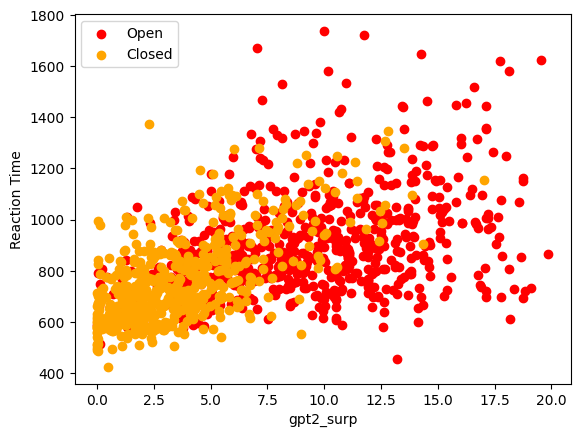

In [50]:
import matplotlib.pyplot as plt

df2_m = df2[(df2['RT']<=1800) & (df2['gpt2_surp']<=20)]

word_token_open = df2_m.loc[df2_m['POS'] == 'Open', 'gpt2_surp']
difference_open = df2_m.loc[df2_m['POS'] == 'Open', 'RT']

word_token_closed = df2_m.loc[df2_m['POS'] == 'Closed', 'gpt2_surp']
difference_closed = df2_m.loc[df2_m['POS'] == 'Closed', 'RT']

# Plotting points based on the condition with blue color
#plt.scatter(df2['gpt2_surp'], df2['Total_RT'], color='blue', label='correct')
#plt.scatter(df3['blip2_surp'], df3['Total_RT'], color='red', label='wrong')

plt.scatter(word_token_open, difference_open, color='red', label='Open')

# Plotting points based on the condition with blue color
plt.scatter(word_token_closed, difference_closed, color='orange', label='Closed')

# Label the axes and set the title
plt.xlabel('gpt2_surp')
plt.ylabel('Reaction Time')
plt.legend()



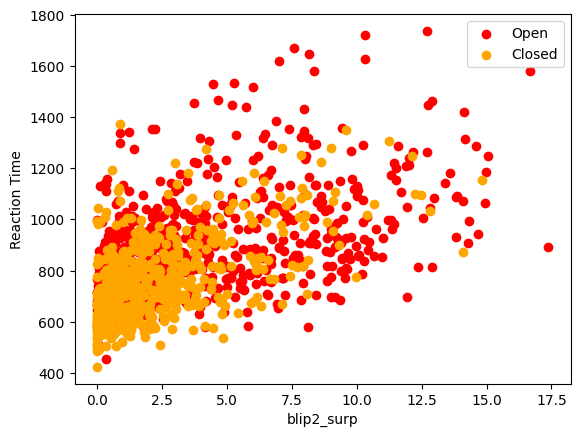

In [52]:
import matplotlib.pyplot as plt

df2_m = df2[(df2['RT']<=1800) & (df2['blip2_surp']<=20)]

word_token_open = df2_m.loc[df2_m['POS'] == 'Open', 'blip2_surp']
difference_open = df2_m.loc[df2_m['POS'] == 'Open', 'RT']

word_token_closed = df2_m.loc[df2_m['POS'] == 'Closed', 'blip2_surp']
difference_closed = df2_m.loc[df2_m['POS'] == 'Closed', 'RT']

# Plotting points based on the condition with blue color
#plt.scatter(df2['gpt2_surp'], df2['Total_RT'], color='blue', label='correct')
#plt.scatter(df3['blip2_surp'], df3['Total_RT'], color='red', label='wrong')

plt.scatter(word_token_open, difference_open, color='red', label='Open')

# Plotting points based on the condition with blue color
plt.scatter(word_token_closed, difference_closed, color='orange', label='Closed')

# Label the axes and set the title
plt.xlabel('blip2_surp')
plt.ylabel('Reaction Time')
plt.legend()



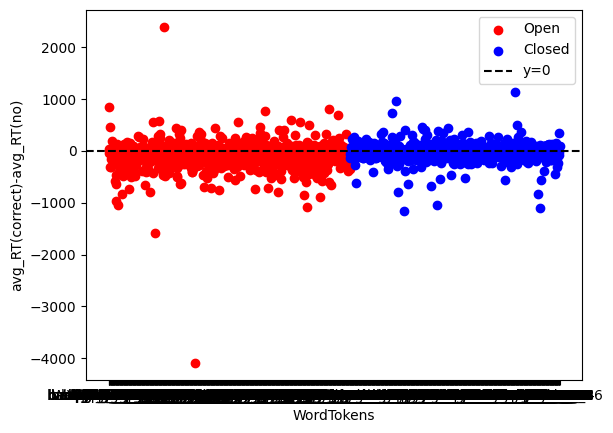

In [60]:
import matplotlib.pyplot as plt
x = pivot_df['WordToken']
y = pivot_df['difference']

word_token_open = pivot_df.loc[pivot_df['POS'] == 'Open', 'WordToken']
difference_open = pivot_df.loc[pivot_df['POS'] == 'Open', 'difference']

word_token_closed = pivot_df.loc[pivot_df['POS'] == 'Closed', 'WordToken']
difference_closed = pivot_df.loc[pivot_df['POS'] == 'Closed', 'difference']
# Define a condition based on WordToken values
condition = (pivot_df['POS'] == 'Open')  # Replace 'YourCondition' with your specific condition
# Plotting all points with red color
plt.scatter(word_token_open, difference_open, color='red', label='Open')

# Plotting points based on the condition with blue color
plt.scatter(word_token_closed, difference_closed, color='blue', label='Closed')

# Label the axes and set the title
plt.xlabel('WordTokens')
plt.ylabel('avg_RT(correct)-avg_RT(no)')
plt.axhline(y=0, color='black', linestyle='--', label='y=0')
plt.legend()



Text(0, 0.5, 'Reaction time')

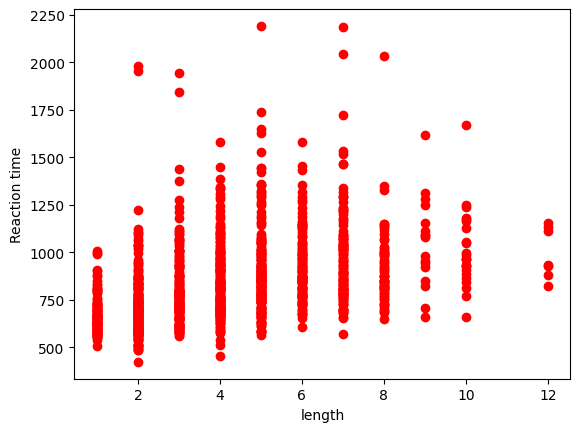

In [55]:
df2_m = df2[df2['RT']<=2500]
plt.scatter(df2_m['Length'], df2_m['RT'], color='red', label='correct')
plt.xlabel('length')
plt.ylabel('Reaction time')
#plt.gca().invert_xaxis()

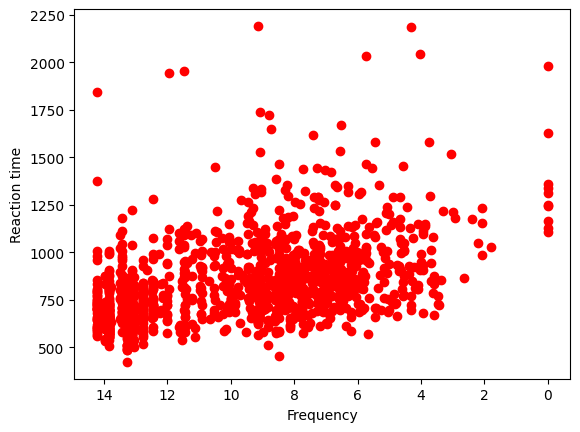

In [58]:
df2_m = df2[df2['RT']<=2500]
plt.scatter(df2_m['Frequency'], df2_m['RT'], color='red', label='correct')
plt.xlabel('Frequency')
plt.ylabel('Reaction time')
plt.gca().invert_xaxis()

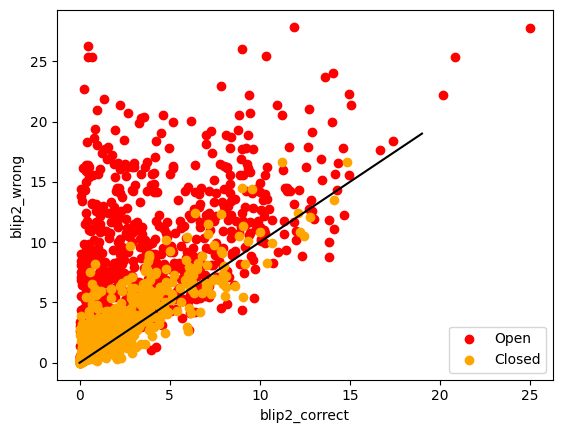

In [59]:
import matplotlib.pyplot as plt


correct_open = df2.loc[df2['POS'] == 'Open', 'blip2_surp']
wrong_open = df3.loc[df3['POS'] == 'Open', 'blip2_surp']

correct_closed = df2.loc[df2['POS'] == 'Closed', 'blip2_surp']
wrong_closed = df3.loc[df3['POS'] == 'Closed', 'blip2_surp']

# Plotting points based on the condition with blue color
#plt.scatter(df2['gpt2_surp'], df2['Total_RT'], color='blue', label='correct')
#plt.scatter(df3['blip2_surp'], df3['Total_RT'], color='red', label='wrong')

plt.scatter(correct_open, wrong_open, color='red', label='Open')

# Plotting points based on the condition with blue color
plt.scatter(correct_closed, wrong_closed, color='orange', label='Closed')

# Label the axes and set the title
plt.xlabel('blip2_correct')
plt.ylabel('blip2_wrong')
plt.legend()

x = range(0, 20)
plt.plot(x, x, label='y=x',color=
         'black')
#plt.scatter(df2['blip2_surp'], df3['blip2_surp'])
#plt.gca().invert_xaxis()

In [ ]:
word_token_closed

1         a_10_1
2        a_10_15
3        a_11_13
4        a_12_14
5         a_12_5
         ...    
446    with_3_19
447    with_3_33
448    with_6_22
449     with_6_5
450    with_8_10
Name: WordToken, Length: 197, dtype: object

In [ ]:
avg = df.groupby(['Sentence', 'WordToken', 'Condition_ID', 'POS'], as_index=False)['RT'].mean()
avg = avg[avg['Condition_ID']!='wrong']
pivot_df = avg.pivot(index=['WordToken','POS'], columns='Condition_ID', values='RT').reset_index()
pivot_df['difference'] = pivot_df['no'] - pivot_df['correct']

In [ ]:
pivot_df

Condition_ID,WordToken,POS,correct,no,difference
0,East_8_25,Open,1246.461538,1214.250000,-32.211538
1,No_8_37,Open,1979.000000,1133.333333,-845.666667
2,Rd._12_25,Open,1108.538462,1154.000000,45.461538
3,Stops._9_37,Open,1626.400000,1161.222222,-465.177778
4,Village_9_25,Open,1340.615385,1656.750000,316.134615
...,...,...,...,...,...
1245,young_1_43,Open,851.000000,923.300000,72.300000
1246,young_1_61,Open,762.200000,929.363636,167.163636
1247,young_1_94,Open,745.444444,861.857143,116.412698
1248,young_6_103,Open,865.375000,834.285714,-31.089286


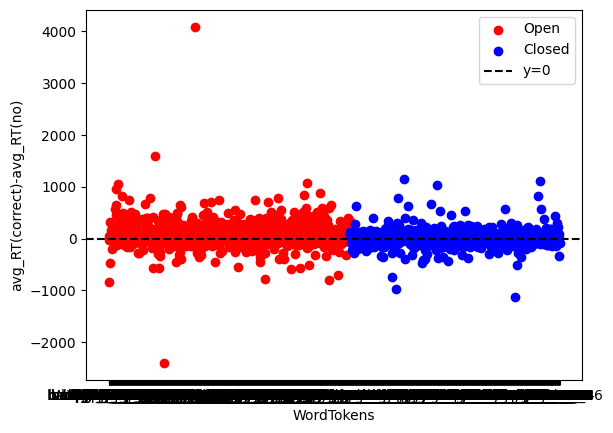

In [ ]:
import matplotlib.pyplot as plt
x = pivot_df['WordToken']
y = pivot_df['difference']

word_token_open = pivot_df.loc[pivot_df['POS'] == 'Open', 'WordToken']
difference_open = pivot_df.loc[pivot_df['POS'] == 'Open', 'difference']

word_token_closed = pivot_df.loc[pivot_df['POS'] == 'Closed', 'WordToken']
difference_closed = pivot_df.loc[pivot_df['POS'] == 'Closed', 'difference']
# Define a condition based on WordToken values
condition = (pivot_df['POS'] == 'Open')  # Replace 'YourCondition' with your specific condition
# Plotting all points with red color
plt.scatter(word_token_open, difference_open, color='red', label='Open')

# Plotting points based on the condition with blue color
plt.scatter(word_token_closed, difference_closed, color='blue', label='Closed')

# Label the axes and set the title
plt.xlabel('WordTokens')
plt.ylabel('avg_RT(correct)-avg_RT(no)')
plt.axhline(y=0, color='black', linestyle='--', label='y=0')
plt.legend()



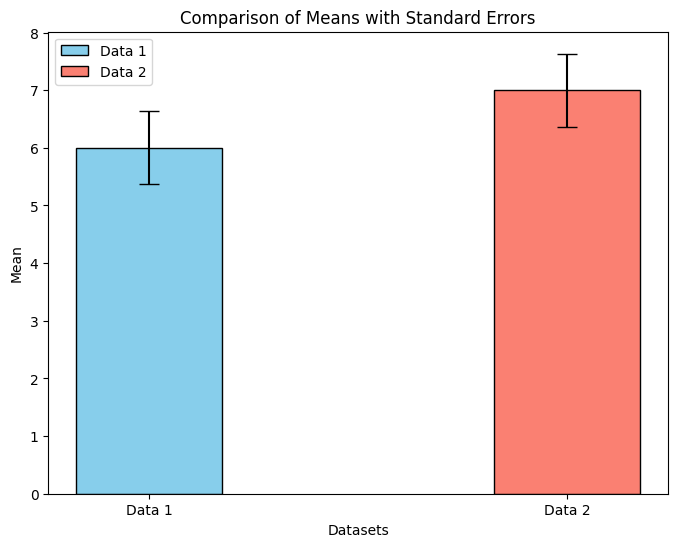

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample lists of values
data_1 = list(difference_open)
data_2 = list(difference_closed)

# Calculate mean and standard error for each dataset
mean_1 = np.mean(data_1)
std_error_1 = np.std(data_1) / np.sqrt(len(data_1))

mean_2 = np.mean(data_2)
std_error_2 = np.std(data_2) / np.sqrt(len(data_2))

# Set the width of the bars
bar_width = 0.35

# Create positions for bars
bar_positions = np.arange(2)

# Plotting
plt.figure(figsize=(8, 6))

# Plot bars for data 1
plt.bar(bar_positions[0], mean_1, color='skyblue', width=bar_width, edgecolor='black', yerr=std_error_1, capsize=7, label='Data 1')

# Plot bars for data 2 with shifted positions
plt.bar(bar_positions[1], mean_2, color='salmon', width=bar_width, edgecolor='black', yerr=std_error_2, capsize=7, label='Data 2')

# Set x-axis ticks and labels
plt.xticks(bar_positions, ['Data 1', 'Data 2'])

# Adding labels and title
plt.xlabel('Datasets')
plt.ylabel('Mean')
plt.title('Comparison of Means with Standard Errors')

# Show legend
plt.legend()

# Show plot
plt.show()
